In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [17]:
df = pd.read_csv("segmentation_data.csv")

In [18]:
df_temp = df[["ID", "Income", "Age"]]

In [19]:
df.drop(["ID"], axis = 1, inplace = True)

In [20]:
scaler = MinMaxScaler()
scaler.fit(df[["Age"]])
df.Age = scaler.transform(df[["Age"]])

scaler.fit(df[["Income"]])
df.Income = scaler.transform(df[["Income"]])

In [21]:
# Kullanacağımız model float değerlerle çalıştığı için değerleri float'a çevireceğiz.
mark_array = df.values

mark_array[:,2] = mark_array[:,2].astype(float) 
mark_array[:,4] = mark_array[:,4].astype(float)

In [22]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter = 20)
clusters = kproto.fit_predict(mark_array, categorical = [0,1,3,5,6])
# categoric veri içeren sütunları categorical parametresi ile belirtiyorum.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 960, ncost: 189.69406478335378
Run: 1, iteration: 2/20, moves: 350, ncost: 172.2989551074067
Run: 1, iteration: 3/20, moves: 242, ncost: 170.87949326510466
Run: 1, iteration: 4/20, moves: 57, ncost: 170.66574219889927
Run: 1, iteration: 5/20, moves: 18, ncost: 170.65123395695463
Run: 1, iteration: 6/20, moves: 2, ncost: 170.65013485331724
Run: 1, iteration: 7/20, moves: 0, ncost: 170.65013485331724
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 763, ncost: 182.50960701984425
Run: 2, iteration: 2/20, moves: 193, ncost: 175.63249501156787
Run: 2, iteration: 3/20, moves: 178, ncost: 174.99796062899816
Run: 2, iteration: 4/20, moves: 8, ncost: 174.99596202641757
Run: 2, iteration: 5/20, moves: 1, ncost: 174.99588956131439
Run: 2, iteration: 6/20, moves: 0, ncost: 174.99588956131439
Init: initializing centroids
Init:

In [23]:
cluster_list = []
for i in clusters:
    cluster_list.append(i)
df["cluster"] = cluster_list

In [24]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,0.844828,2,0.324781,1,2,5
1,1,1,0.068966,1,0.420210,1,2,9
2,0,0,0.534483,1,0.195144,0,0,7
3,0,0,0.465517,1,0.496223,1,1,6
4,0,0,0.603448,1,0.413842,1,1,6


In [25]:
df[["ID", "Income", "Age"]] = df_temp

In [26]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
0,0,0,67,2,124670,1,2,5,100000001
1,1,1,22,1,150773,1,2,9,100000002
2,0,0,49,1,89210,0,0,7,100000003
3,0,0,45,1,171565,1,1,6,100000004
4,0,0,53,1,149031,1,1,6,100000005


In [27]:
df[df["cluster"] == 0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
16,0,0,53,1,125550,1,0,0,100000017
46,0,0,39,1,140182,1,0,0,100000047
68,0,0,37,1,106978,1,2,0,100000069
109,0,1,35,1,140520,1,0,0,100000110
150,0,0,42,1,119926,1,0,0,100000151
151,0,0,38,1,108784,1,2,0,100000152
162,0,0,36,1,127833,1,2,0,100000163
164,0,0,36,1,124445,1,2,0,100000165
170,0,0,33,1,95445,1,0,0,100000171
173,0,0,33,1,108899,1,0,0,100000174


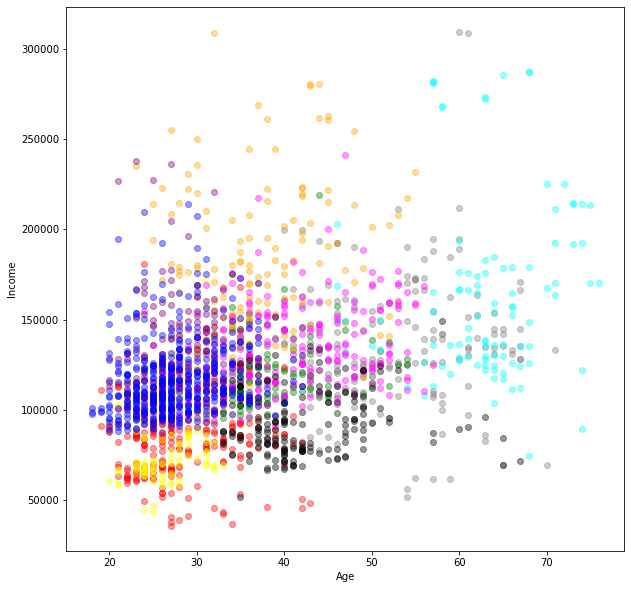

In [29]:
colors = ["green", "red", "grey", "orange", "yellow", "cyan", "magenta", "black", "purple", "blue"]
plt.figure(figsize = (10,10))
plt.xlabel("Age")
plt.ylabel("Income")
for i in range(10):
    df_n = df[df["cluster"] == i]
    plt.scatter(df_n.Age, df_n.Income, color = colors[i], alpha = 0.4)